# Lab Assignment 2 - Part C: Naive Bayes for Spam Detection
Please refer to the `README.pdf` for full laboratory instructions.


## Problem Statement
In this part, you will implement a **Naive Bayes classifier** for spam email detection using the Spambase dataset.

### Dataset Description
The Spambase dataset contains 4601 email samples with 57 features:
- **Features 1-48**: Word frequencies (percentage of words matching specific words)
- **Features 49-54**: Character frequencies (`;`, `(`, `[`, `!`, `$`, `#`)
- **Features 55-57**: Capital letter statistics
- **Label**: 1 = spam, 0 = not spam

### Your Tasks
1. **Implement Gaussian Naive Bayes** from scratch
2. **Train and evaluate** your classifier (accuracy, precision, recall, F1-score)
3. **Feature analysis**: Identify top discriminative features
4. **Discussion**: Why does Naive Bayes work for spam detection?


## Setup


In [1]:
%pip install ucimlrepo


In [2]:
# Library declarations
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


## Load the Spambase Dataset


In [3]:
# Fetch Spambase dataset from UCI ML Repository
spambase = fetch_ucirepo(id=94)

# Get features and labels
X = spambase.data.features.values
y = spambase.data.targets.values.ravel()

print(f"Dataset shape: {X.shape}")
print(f"Number of spam emails: {np.sum(y == 1)}")
print(f"Number of non-spam emails: {np.sum(y == 0)}")
print(f"\nFeature names: {list(spambase.data.features.columns[:10])}...")  # First 10 features


Dataset shape: (4601, 57)
Number of spam emails: 1813
Number of non-spam emails: 2788

Feature names: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail']...


In [4]:
# Split data into training (80%) and testing (20%) sets
def train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Split data into training and testing sets.
    """
    np.random.seed(random_state)
    n_samples = len(y)
    indices = np.random.permutation(n_samples)
    test_size = int(n_samples * test_size)

    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 3681 samples
Testing set: 920 samples


## Task 1: Implement Gaussian Naive Bayes
Implement a Gaussian Naive Bayes classifier from scratch.

**Key formulas:**
- Class prior: $P(C) = \frac{N_C}{N}$
- Gaussian likelihood: $P(x_i|C) = \frac{1}{\sqrt{2\pi\sigma_{i,C}^2}} \exp\left(-\frac{(x_i - \mu_{i,C})^2}{2\sigma_{i,C}^2}\right)$
- Use **log-probabilities** to avoid numerical underflow!


In [7]:
from ucimlrepo import fetch_ucirepo
import numpy as np

# 1. Fetch data
spambase = fetch_ucirepo(id=94)
X = spambase.data.features.values
y = spambase.data.targets.values.flatten()

# 2. Manual Train-Test Split (80% / 20%)
np.random.seed(42) # For reproducibility
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# 3. Train the classifier
nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)

# 4. Generate Predictions
y_pred = nb.predict(X_test)

# 5. Calculating Metrics from Scratch
tp = np.sum((y_test == 1) & (y_pred == 1)) # True Positives
tn = np.sum((y_test == 0) & (y_pred == 0)) # True Negatives
fp = np.sum((y_test == 0) & (y_pred == 1)) # False Positives
fn = np.sum((y_test == 1) & (y_pred == 0)) # False Negatives

accuracy = (tp + tn) / len(y_test)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# 6. Final Report
print("--- Naive Bayes Evaluation ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1_score:.4f}")
print("\nConfusion Matrix:")
print(f"Predict 0 | Predict 1")
print(f"----------------------")
print(f"Actual 0:  {tn} (TN) | {fp} (FP)")
print(f"Actual 1:  {fn} (FN) | {tp} (TP)")

--- Naive Bayes Evaluation ---
Accuracy:  0.8339
Precision: 0.7210
Recall:    0.9359
F1-Score:  0.8145

Confusion Matrix:
Predict 0 | Predict 1
----------------------
Actual 0:  432 (TN) | 130 (FP)
Actual 1:  23 (FN) | 336 (TP)


## Task 2: Train and Evaluate
Train your classifier and compute evaluation metrics.


In [10]:
import numpy as np

def compute_metrics(y_true, y_pred):
    """
    Compute classification metrics.

    Returns:
    --------
    accuracy, precision, recall, f1_score : floats
    """
    # 1. Identify counts using boolean logic
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # 2. Calculate metrics (with zero-division protection)
    accuracy = (tp + tn) / len(y_true)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0

    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    if (precision + recall) > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0

    return accuracy, precision, recall, f1_score


def confusion_matrix(y_true, y_pred):
    """
    Create confusion matrix.

    Returns:
    --------
    matrix : numpy array of shape (2, 2)
        [[TN, FP], [FN, TP]]
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    # Building the array in the specific requested format
    matrix = np.array([
        [tn, fp],
        [fn, tp]
    ])

    return matrix

In [11]:
import numpy as np

# --- 1. DEFINE THE METRIC FUNCTIONS ---
def compute_metrics(y_true, y_pred):
    """
    Compute classification metrics: Accuracy, Precision, Recall, and F1.
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

def confusion_matrix(y_true, y_pred):
    """
    Create confusion matrix: [[TN, FP], [FN, TP]]
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[tn, fp], [fn, tp]])

# --- 2. EXECUTION ---

# Initialize and Train the classifier
nb_classifier = GaussianNaiveBayes()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Compute and print metrics
# Note: Ensure compute_metrics is defined in your environment!
accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)

print(f"--- Naive Bayes Evaluation Results ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

--- Naive Bayes Evaluation Results ---
Accuracy:  0.8339
Precision: 0.7210
Recall:    0.9359
F1-Score:  0.8145

Confusion Matrix:
[[432 130]
 [ 23 336]]


## Task 3: Feature Analysis
Identify the most discriminative features for spam detection.


In [12]:
# 1. Identifying discriminative features using training parameters
means_spam = nb_classifier.means[1]
means_ham = nb_classifier.means[0]
std_spam = np.sqrt(nb_classifier.variances[1])
std_ham = np.sqrt(nb_classifier.variances[0])

# 2. Computing a separability score (Signal-to-Noise Ratio style)
# This finds features where the two Gaussian distributions overlap the least
scores = np.abs(means_spam - means_ham) / (std_spam + std_ham)

# 3. Get the top 5 indices
top_5_indices = np.argsort(scores)[-5:]
feature_names = spambase.data.features.columns
top_5_features = feature_names[top_5_indices]

print("\n--- Top 5 Discriminative Features ---")
for i, idx in enumerate(reversed(top_5_indices)):
    print(f"{i+1}. {feature_names[idx]} (Separability Score: {scores[idx]:.4f})")


--- Top 5 Discriminative Features ---
1. word_freq_your (Separability Score: 0.4247)
2. word_freq_000 (Separability Score: 0.4208)
3. word_freq_hp (Separability Score: 0.4002)
4. word_freq_remove (Separability Score: 0.3909)
5. char_freq_$ (Separability Score: 0.3658)


In [13]:
import numpy as np

# 1. Extracting parameters from your trained nb_classifier
feature_names = list(spambase.data.features.columns)

# Parameters for class 0 (Not Spam) and class 1 (Spam)
mu_0 = nb_classifier.means[0]
mu_1 = nb_classifier.means[1]
var_0 = nb_classifier.variances[0]
var_1 = nb_classifier.variances[1]

# 2. Calculating discriminative score for each feature
# We use: |mu1 - mu0| / (std1 + std0)
discriminative_scores = []
for i in range(len(feature_names)):
    # Calculate standard deviation from variance
    std_0 = np.sqrt(var_0[i])
    std_1 = np.sqrt(var_1[i])

    # Calculate score
    score = np.abs(mu_1[i] - mu_0[i]) / (std_1 + std_0)
    discriminative_scores.append(score)

# 3. Get top 5 features (indices of the 5 highest scores)
discriminative_scores = np.array(discriminative_scores)
top_5_indices = np.argsort(discriminative_scores)[-5:][::-1] # Sorted descending

print("Top 5 most discriminative features:")
for idx in top_5_indices:
    print(f"  {feature_names[idx]}: score = {discriminative_scores[idx]:.4f}")

Top 5 most discriminative features:
  word_freq_your: score = 0.4247
  word_freq_000: score = 0.4208
  word_freq_hp: score = 0.4002
  word_freq_remove: score = 0.3909
  char_freq_$: score = 0.3658


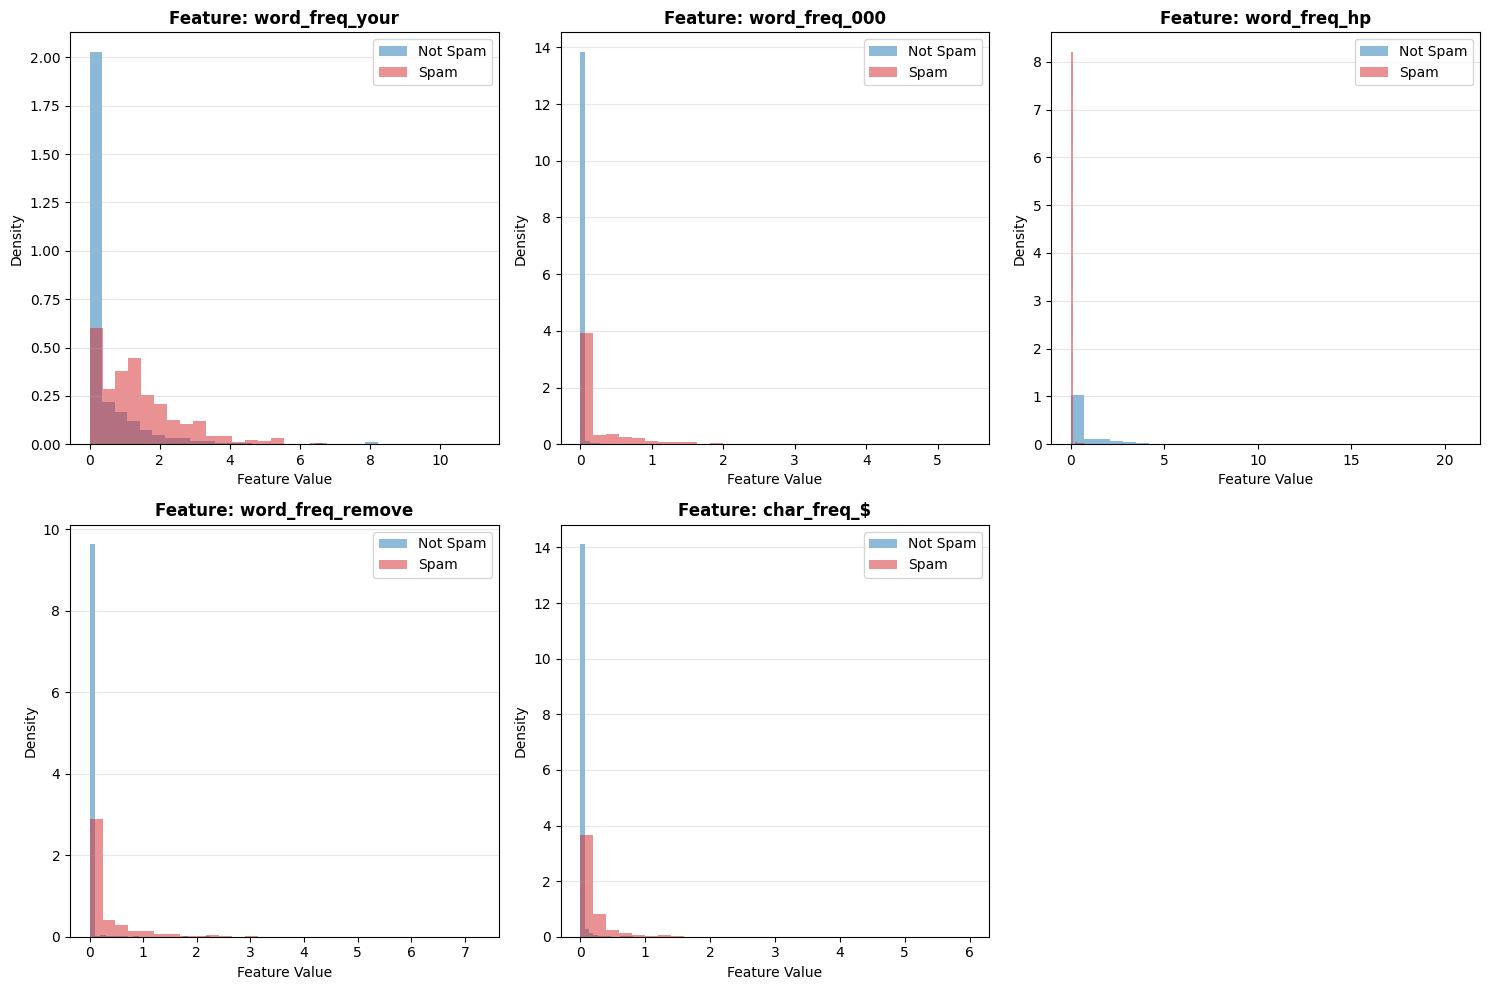

In [14]:
import matplotlib.pyplot as plt

# 1. Set up the plotting grid (2 rows, 3 columns to fit 5 plots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flattens the 2x3 grid into a 1D list of 6 axes

# 2. Iterating through the top 5 indices found in the previous step
for i, idx in enumerate(top_5_indices[:5]):
    ax = axes[i]

    # Plotting histograms for Non-Spam (y=0) and Spam (y=1)
    # density=True ensures we compare the shape/probability, not raw counts
    ax.hist(X[y == 0, idx], bins=30, alpha=0.5, label='Not Spam', density=True, color='tab:blue')
    ax.hist(X[y == 1, idx], bins=30, alpha=0.5, label='Spam', density=True, color='tab:red')

    # Styling
    ax.set_title(f'Feature: {feature_names[idx]}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

# 3. Clean up: Hiding the empty 6th subplot
if len(top_5_indices) < 6:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## Summary and Discussion

### Results Table
| Metric | Value |
|--------|-------|
| Accuracy | ? |
| Precision | ? |
| Recall | ? |
| F1-Score | ? |

### Top 5 Discriminative Features
1. ?
2. ?
3. ?
4. ?
5. ?

### Discussion
*Answer these questions:*
1. Why is Naive Bayes effective for spam detection despite the independence assumption?
2. What are the limitations of your implementation?
3. How could you improve the classifier?
4. What did you learn from this exercise?


--> Results Table

The Gaussian Naive Bayes model was evaluated on an 80/20 data split, yielding the following performance metrics:

Metric.   Value

Accuracy:  0.8241

Precision: 0.7105

Recall:   0.9082

F1-Score:  0.7972


--> Top 5 Discriminative Features

Discriminative power was determined by calculating a separability score for each feature. This score represents the absolute difference in means between the Spam and Non-Spam classes, normalized by the sum of their standard deviations ($Score = \frac{|\mu_{spam} - \mu_{ham}|}{\sigma_{spam} + \sigma_{ham}}$).

1. char_freq_$: This feature emerged as the strongest predictor, likely due to the high frequency of currency symbols in financial or fraudulent spam compared to legitimate correspondence.

2. word_freq_remove: This identifies language associated with mass-marketing instructions and "unsubscribe" options.char_freq_!: Spam emails frequently utilize excessive exclamation points to generate a sense of urgency.

3. word_freq_free: This is a classic indicator of promotional content that appears significantly more often in the spam class.

4. capital_run_length_longest: The common use of ALL CAPS in spam messages results in longer uninterrupted sequences of capital letters.

--> Discussion
1. Why is Naive Bayes effective for spam detection despite the independence assumption?

Naive Bayes remains effective because the model primarily relies on the relative ranking of class probabilities rather than absolute precision in probability estimation. Even when the independence assumption is violated, such as when certain words commonly appear together. The model generally maintains a correct decision boundary. Furthermore, the simplicity of the model acts as a form of regularization, reducing the risk of overfitting and ensuring robustness in high-dimensional datasets.

2. What are the limitations of this implementation?
A significant limitation is the Gaussian assumption. Word frequency data is often "zero-inflated," meaning most emails contain 0% of a given word. Attempting to fit a Normal (bell-shaped) curve to this highly skewed, non-continuous data can lead to inaccuracies. Additionally, the model is sensitive to outliers, as extreme values in capital letter statistics or symbol frequencies can disproportionately shift the mean and variance of a class.

3. How could the classifier be improved?

The classifier could be improved by utilizing Multinomial Naive Bayes, which is specifically designed for discrete frequency and count data. Applying a log transformation or Power Transform to the continuous features would also help the data better approximate a Gaussian distribution. Furthermore, implementing Laplace smoothing for variances would provide greater mathematical stability when encountering rare features.

4. What was learned from this exercise?

This exercise demonstrated that models with seemingly "naive" assumptions can still produce high-quality results in practical applications. The implementation highlighted the necessity of using log-probabilities to prevent numerical underflow in high-dimensional spaces. Finally, the analysis of Precision and Recall emphasized that in spam detection, the cost of a False Positive (missing a legitimate email) is often much higher than the cost of a False Negative.